# Day 09. Exercise 02
# Metrics

## 0. Imports

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
from sklearn.utils import shuffle
from sklearn.tree import plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, GridSearchCV, ParameterGrid
import joblib
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings('ignore')

RS=21

## 1. Preprocessing

1. Create the same dataframe as in the previous exercise.
2. Using `train_test_split` with parameters `test_size=0.2`, `random_state=21` get `X_train`, `y_train`, `X_test`, `y_test`. Use the additional parameter `stratify`.

In [2]:
df = pd.read_csv("../data/day-of-week-not-scaled.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 43 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   numTrials         1686 non-null   int64  
 1   hour              1686 non-null   int64  
 2   uid_user_0        1686 non-null   float64
 3   uid_user_1        1686 non-null   float64
 4   uid_user_10       1686 non-null   float64
 5   uid_user_11       1686 non-null   float64
 6   uid_user_12       1686 non-null   float64
 7   uid_user_13       1686 non-null   float64
 8   uid_user_14       1686 non-null   float64
 9   uid_user_15       1686 non-null   float64
 10  uid_user_16       1686 non-null   float64
 11  uid_user_17       1686 non-null   float64
 12  uid_user_18       1686 non-null   float64
 13  uid_user_19       1686 non-null   float64
 14  uid_user_2        1686 non-null   float64
 15  uid_user_20       1686 non-null   float64
 16  uid_user_21       1686 non-null   float64


,numTrials,hour,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,6,20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,7,20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,8,20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
df2 = pd.read_csv("../data/dayofweek.csv")
df2.info()
df2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   numTrials         1686 non-null   float64
 1   hour              1686 non-null   float64
 2   dayofweek         1686 non-null   int64  
 3   uid_user_0        1686 non-null   float64
 4   uid_user_1        1686 non-null   float64
 5   uid_user_10       1686 non-null   float64
 6   uid_user_11       1686 non-null   float64
 7   uid_user_12       1686 non-null   float64
 8   uid_user_13       1686 non-null   float64
 9   uid_user_14       1686 non-null   float64
 10  uid_user_15       1686 non-null   float64
 11  uid_user_16       1686 non-null   float64
 12  uid_user_17       1686 non-null   float64
 13  uid_user_18       1686 non-null   float64
 14  uid_user_19       1686 non-null   float64
 15  uid_user_2        1686 non-null   float64
 16  uid_user_20       1686 non-null   float64


,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [4]:
df["dayofweek"] = df2["dayofweek"]
df

,numTrials,hour,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,dayofweek
0,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
1,2,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
2,3,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
3,4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
4,5,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
1682,6,20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
1683,7,20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3
1684,8,20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3


In [5]:
target = df["dayofweek"]
features = df.drop(columns=["dayofweek"])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, 
                                                    random_state=21, stratify=target)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1348, 43)
(1348,)
(338, 43)
(338,)


## 2. SVM

1. Use the best parameters from the previous exercise and train the model of SVM.
2. You need to calculate `accuracy`, `precision`, `recall`, `ROC AUC`.

 - `precision` and `recall` should be calculated for each class (use `average='weighted'`)
 - `ROC AUC` should be calculated for each class against any other class (all possible pairwise combinations) and then weighted average should be applied for the final metric
 - the code in the cell should display the result as below:

```
accuracy is 0.88757
precision is 0.89267
recall is 0.88757
roc_auc is 0.97878
```

In [7]:
#model.predict_proba(X_test)
model = svm.SVC(random_state=21, probability=True, kernel="rbf", 
                class_weight=None, gamma="auto", C=10)
model.fit(X_train, y_train)
predict = model.predict(X_test)

accuracy = accuracy_score(y_test, predict)
precision = precision_score(y_test, predict, average='weighted')
recall = recall_score(y_test, predict, average='weighted')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), average='weighted', multi_class='ovo')

In [8]:
print(f'accuracy is {accuracy:.5f}')
print(f'precision is {precision:.5f}')
print(f'recall is {recall:.5f}')
print(f'roc_auc is {roc_auc:.5f}')

accuracy is 0.88757
precision is 0.89267
recall is 0.88757
roc_auc is 0.97878


## 3. Decision tree

1. The same task for decision tree

In [9]:
#{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 22}
model = DecisionTreeClassifier(random_state=21, class_weight="balanced", criterion="gini", max_depth=22)
model.fit(X_train, y_train)
predict = model.predict(X_test)

accuracy = accuracy_score(y_test, predict)
precision = precision_score(y_test, predict, average='weighted')
recall = recall_score(y_test, predict, average='weighted')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), average='weighted', multi_class='ovo')
print(f'accuracy is {accuracy:.5f}')
print(f'precision is {precision:.5f}')
print(f'recall is {recall:.5f}')
print(f'roc_auc is {roc_auc:.5f}')

accuracy is 0.89053
precision is 0.89262
recall is 0.89053
roc_auc is 0.93664


## 4. Random forest

1. The same task for random forest.

In [10]:
model = RandomForestClassifier(random_state=21, class_weight=None, criterion="gini",
                               max_depth=28, n_estimators=50)
model.fit(X_train, y_train)
predict = model.predict(X_test)

accuracy = accuracy_score(y_test, predict)
precision = precision_score(y_test, predict, average='weighted')
recall = recall_score(y_test, predict, average='weighted')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), average='weighted', multi_class='ovo')
print(f'accuracy is {accuracy:.5f}')
print(f'precision is {precision:.5f}')
print(f'recall is {recall:.5f}')
print(f'roc_auc is {roc_auc:.5f}')

accuracy is 0.92899
precision is 0.93009
recall is 0.92899
roc_auc is 0.99033


## 5. Predictions

1. Choose the best model.
2. Analyze: for which `weekday` your model makes the most errors (in % of the total number of samples of that class in your full dataset), for which `labname` and for which `users`.
3. Save the model.

In [11]:
model = RandomForestClassifier(random_state=21, class_weight=None, criterion="gini",
                               max_depth=28, n_estimators=50)
model.fit(X_train, y_train)
predict = model.predict(X_test)

accuracy = accuracy_score(y_test, predict)
precision = precision_score(y_test, predict, average='weighted')
recall = recall_score(y_test, predict, average='weighted')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), average='weighted', multi_class='ovo')
print(f'accuracy is {accuracy:.5f}')
print(f'precision is {precision:.5f}')
print(f'recall is {recall:.5f}')
print(f'roc_auc is {roc_auc:.5f}')

accuracy is 0.92899
precision is 0.93009
recall is 0.92899
roc_auc is 0.99033


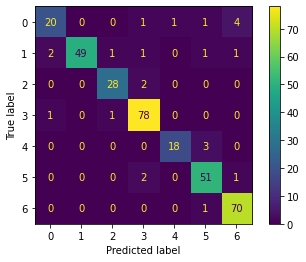

In [12]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [13]:
df_pred = pd.DataFrame(predict, columns={"pred"})
df_pred["target"] = y_test.reset_index(drop=True)
df_pred["res"] = (df_pred["pred"]==df_pred["target"])


In [14]:
#Monday
df_pred.groupby(df_pred["target"]).mean() * 100

,pred,res
target,,
0,133.333333,74.074074
1,118.181818,89.090909
2,206.666667,93.333333
3,295.000000,97.500000
4,414.285714,85.714286
5,494.444444,94.444444
6,598.591549,98.591549


In [15]:
y_test

1087    1
16      5
563     6
1381    3
1199    2
       ..
1411    3
1079    1
1222    2
1064    1
1243    2
Name: dayofweek, Length: 338, dtype: int64

In [16]:
df_errors = df_pred[df_pred["res"]==False].join(X_test)
df_errors.groupby(df_errors["res"]).mean() * 100

,pred,target,numTrials,hour,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
res,,,,,,,,,,,,,,,,,,,,,
False,383.333333,204.166667,1060.0,1620.0,0.0,20.0,0.0,0.0,0.0,40.0,...,0.0,0.0,0.0,0.0,80.0,20.0,0.0,0.0,0.0,0.0


In [17]:
df_errors.sum()

pred                92.0
target              49.0
res                  0.0
numTrials           53.0
hour                81.0
uid_user_0           0.0
uid_user_1           1.0
uid_user_10          0.0
uid_user_11          0.0
uid_user_12          0.0
uid_user_13          2.0
uid_user_14          0.0
uid_user_15          0.0
uid_user_16          0.0
uid_user_17          1.0
uid_user_18          0.0
uid_user_19          1.0
uid_user_2           0.0
uid_user_20          0.0
uid_user_21          0.0
uid_user_22          0.0
uid_user_23          0.0
uid_user_24          0.0
uid_user_25          0.0
uid_user_26          0.0
uid_user_27          0.0
uid_user_28          0.0
uid_user_29          0.0
uid_user_3           0.0
uid_user_30          0.0
uid_user_31          0.0
uid_user_4           0.0
uid_user_6           0.0
uid_user_7           0.0
uid_user_8           0.0
labname_code_rvw     0.0
labname_lab02        0.0
labname_lab03        0.0
labname_lab03s       0.0
labname_lab05s       0.0


In [18]:
joblib.dump(model, "../data/model_02.joblib")

['../data/model_02.joblib']

## 6. Function

1. Write a function that takes a list of different models and a corresponding list of parameters (dicts) and returns a dict that contains all the 4 metrics for each model.

In [19]:
#     models = {'Decision Tree': DecisionTreeClassifier(random_state=rs), 
#               'Random Forest': RandomForestClassifier(random_state=rs),
#               'Logistic Regression': LogisticRegression(random_state=rs)}
# def models_train_metrics(features_train, target_train, features_valid, target_valid):
#     table = {}
#     for model in models:
#         scores = {}
#         cur_model = models[model]
#         cur_model.fit(features_train, target_train)
#         prediction = cur_model.predict(features_valid)    
#         scores['accuracy'] = accuracy_score(target_valid, prediction)
#         scores['f1_score'] = f1_score(target_valid, prediction)
#         scores['roc_auc'] = roc_auc_score(target_valid, prediction)
#         table[model]=scores
#     return pd.DataFrame(table)

In [20]:
# models = {'Decision Tree': DecisionTreeClassifier(), 
#               'Random Forest': RandomForestClassifier(),
#               'svm.SVC': svm.SVC()}
    
Decision_Tree = {"random_state": 21, "class_weight": "balanced", "criterion": "gini", "max_depth": 22}
Random_Forest = {"random_state": 21, "class_weight": None, "criterion": "gini",
                               "max_depth": 28, "n_estimators": 50}
SVC = {"random_state": 21, "probability": True, "kernel": "rbf", 
                "class_weight": None, "gamma": "auto", "C": 10}

In [21]:
models = [svm.SVC(), DecisionTreeClassifier(), RandomForestClassifier()]
parameters = [SVC, Decision_Tree, Random_Forest]

In [22]:
def models_train_metrics(models, parameters):
    
    table = {}
    for model, params in zip(models, parameters):
        scores={}
        model.set_params(**params).fit(X_train, y_train)
        predict = model.predict(X_test)    
        scores['accuracy'] = accuracy_score(y_test, predict)
        scores["precision"] = precision_score(y_test, predict, average='weighted')
        scores["recall"] = recall_score(y_test, predict, average='weighted')
        scores["roc_auc"] = roc_auc_score(y_test, model.predict_proba(X_test), average='weighted', multi_class='ovo')
        table[model]=scores
    return table

In [23]:
models_train_metrics(models, parameters)

{SVC(C=10, gamma='auto', probability=True, random_state=21): {'accuracy': 0.8875739644970414,
  'precision': 0.8926729169690374,
  'recall': 0.8875739644970414,
  'roc_auc': 0.9787793228216216},
 DecisionTreeClassifier(class_weight='balanced', max_depth=22, random_state=21): {'accuracy': 0.8905325443786982,
  'precision': 0.8926192681313897,
  'recall': 0.8905325443786982,
  'roc_auc': 0.9366351447213223},
 RandomForestClassifier(max_depth=28, n_estimators=50, random_state=21): {'accuracy': 0.9289940828402367,
  'precision': 0.9300865038851309,
  'recall': 0.9289940828402367,
  'roc_auc': 0.9903274757720744}}